In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df=pd.read_csv('train.csv')

In [50]:
df.head()

,image_id,photo_url,photo_image_url,photo_submitted_at,obs_day,obs_hour,obs_min,obs_sec,image_category,width,...,iso,aperture_value,focal_length,exposure_time,latitude,longitude,country,city,total_days,stats_downloads
0,68105c019b,https://unsplash.com/photos/7AcMUSYRZpU,https://images.unsplash.com/photo-147455715737...,2016-09-22 15:13:10.134081,Thursday,15,13,10,Featured,2592,...,200.0,14.0,50.0,1/60,NaN,NaN,USA,"Wichita, Kansas",2361,167503
1,06d11c4edd,https://unsplash.com/photos/grWwLCSRr4o,https://images.unsplash.com/photo-157005349769...,2019-10-02 21:59:51.712464,Wednesday,21,59,51,Featured,4000,...,100.0,2.5,30.0,1/1250,NaN,NaN,NaN,NaN,1255,1839
2,f6599edba1,https://unsplash.com/photos/OR4q9_Y2nuY,https://images.unsplash.com/photo-158018448188...,2020-01-28 04:10:11.128061,Tuesday,4,10,11,Featured,5504,...,64.0,2.8,48.0,1/1600,NaN,NaN,NaN,NaN,1138,787
3,0f4bcc2d36,https://unsplash.com/photos/Qc3AmsZ3g2A,https://images.unsplash.com/photo-1542066365-0...,2018-11-12 23:46:21.990378,Monday,23,46,21,Featured,3627,...,139.0,2.2,4.7,1/100,32.784562,-79.785303,United States,Isle of Palms,1579,2049
4,74db502ed5,https://unsplash.com/photos/6BLE9HVwIJw,https://images.unsplash.com/photo-158781208024...,2020-04-25 11:04:20.912527,Saturday,11,4,20,Featured,4896,...,400.0,6.4,22.2,1/420,66.074878,-23.125068,Island,Ísafjörður,1050,2982


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12197 entries, 0 to 12196
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   image_id            12197 non-null  object 
 1   photo_url           12197 non-null  object 
 2   photo_image_url     12197 non-null  object 
 3   photo_submitted_at  12197 non-null  object 
 4   obs_day             12197 non-null  object 
 5   obs_hour            12197 non-null  int64  
 6   obs_min             12197 non-null  int64  
 7   obs_sec             12197 non-null  int64  
 8   image_category      12197 non-null  object 
 9   width               12197 non-null  int64  
 10  height              12197 non-null  int64  
 11  aspect_ratio        12197 non-null  float64
 12  description1        5151 non-null   object 
 13  description2        11544 non-null  object 
 14  camera_make         12157 non-null  object 
 15  camera_model        12149 non-null  object 
 16  iso 

<AxesSubplot:>

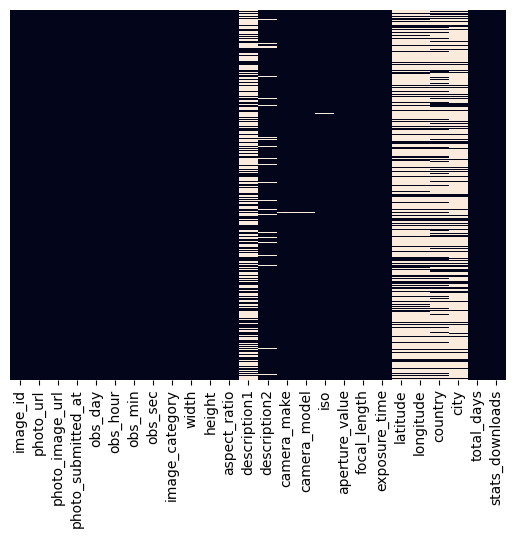

In [52]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [53]:
df.drop(['photo_url','photo_image_url','photo_submitted_at','height','obs_day','obs_hour','obs_min','obs_sec','width','height','description1','description2','latitude','longitude','country','city'],axis=1,inplace=True)


<AxesSubplot:>

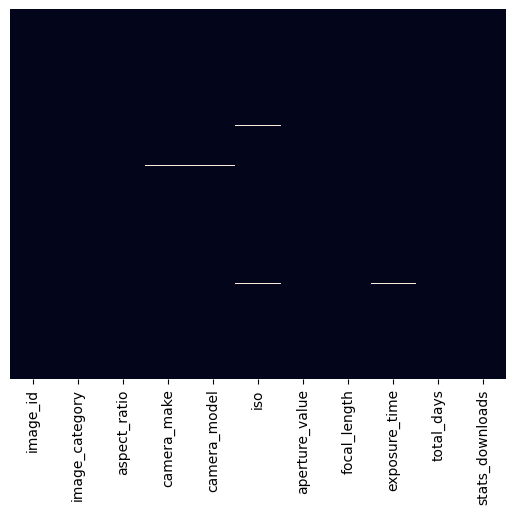

In [54]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [8]:
df['exposure_time']

0          1/60
1        1/1250
2        1/1600
3         1/100
4         1/420
          ...  
12192     1/400
12193     1/320
12194    1/4000
12195     1/320
12196     1/800
Name: exposure_time, Length: 12197, dtype: object

In [55]:
def floater(data):
    for i in str(data["exposure_time"]):
        if i.isalpha():
            return None
    spl = str(data["exposure_time"]).split("/")
    
    if len(spl) > 1:
        return float(spl[0])/float(spl[1])
    else:
        return float(spl[0])

df["exposure_time"] = df.apply(floater, axis=1)

In [85]:
df = df[df["exposure_time"].notna()]
df = df[df["iso"].notna()]
df = df[df["camera_make"].notna()]
df = df[df["camera_model"].notna()]

In [92]:
# df = df[df["camera_make"].notna()]
df['camera_make']=df['camera_make'].str.upper()
def split_cam():
    for i in range(len(df)):
        df['camera_make'].iloc[i]= (df['camera_make'].iloc[i]).replace(',','').split(' ')[0]

split_cam()
df['camera_make'].value_counts().head(20)

C:\Users\VENKATESH\AppData\Local\Temp\ipykernel_46008\3396484650.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['camera_make'].iloc[i]= (df['camera_make'].iloc[i]).replace(',','').split(' ')[0]


CANON         4837
NIKON         2621
SONY          2047
FUJIFILM       853
DJI            443
APPLE          317
PANASONIC      262
OLYMPUS        157
HASSELBLAD     146
RICOH          113
SAMSUNG         51
GOPRO           38
LEICA           35
GOOGLE          30
PENTAX          27
HUAWEI          22
XIAOMI          10
ONEPLUS          6
MOTOROLA         5
LG               5
Name: camera_make, dtype: int64

<AxesSubplot:>

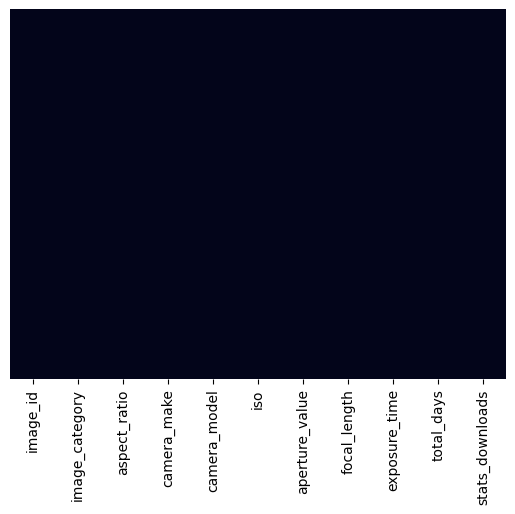

In [99]:
sns.heatmap(mod_df.isnull(),yticklabels=False,cbar=False)

In [93]:
df.to_csv('mod_train.csv',index=False)

In [94]:
mod_df=pd.read_csv('mod_train.csv')


In [95]:
mod_df

,image_id,image_category,aspect_ratio,camera_make,camera_model,iso,aperture_value,focal_length,exposure_time,total_days,stats_downloads
0,68105c019b,Featured,1.50,CANON,Canon EOS 60D,200.0,14.0,50.0,0.016667,2361,167503
1,06d11c4edd,Featured,0.67,SONY,ILCE-6500,100.0,2.5,30.0,0.000800,1255,1839
2,f6599edba1,Featured,0.67,NIKON,NIKON D850,64.0,2.8,48.0,0.000625,1138,787
3,0f4bcc2d36,Featured,1.78,DJI,FC220,139.0,2.2,4.7,0.010000,1579,2049
4,74db502ed5,Featured,1.50,FUJIFILM,X-T10,400.0,6.4,22.2,0.002381,1050,2982
...,...,...,...,...,...,...,...,...,...,...,...
12054,18eaca644e,Featured,0.73,CANON,Canon EOS 5D Mark IV,100.0,5.6,300.0,0.002500,1265,2353
12055,eb25cd769e,Featured,0.72,CANON,Canon EOS 5D Mark III,400.0,5.0,100.0,0.003125,1503,3541
12056,73302461d0,Featured,1.50,CANON,Canon EOS M,400.0,4.0,21.0,0.000250,2501,14581
12057,f2587b2b08,Featured,1.50,NIKON,NIKON D5300,800.0,1.8,50.0,0.003125,2508,9247


In [97]:
df_k=pd.read_csv('train_keywords.csv')

In [101]:
df_k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1291032 entries, 0 to 1291031
Data columns (total 4 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   image_id                1291032 non-null  object 
 1   image_classification    1291032 non-null  object 
 2   classification_keyword  1291032 non-null  object 
 3   confidence_value        1142625 non-null  float64
dtypes: float64(1), object(3)
memory usage: 39.4+ MB


<AxesSubplot:>

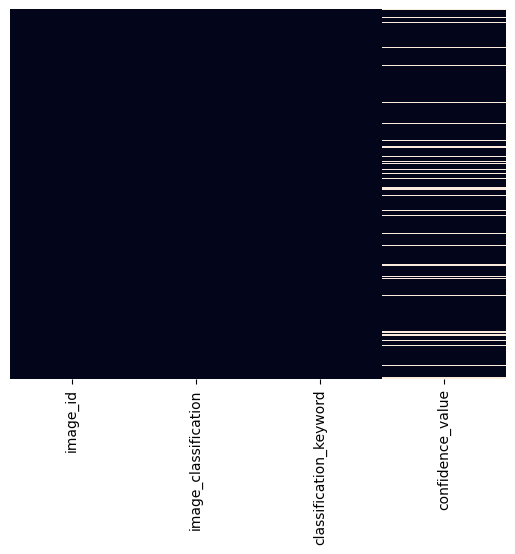

In [100]:
sns.heatmap(df_k.isnull(),yticklabels=False,cbar=False)

In [106]:
df_k['classification_keyword'].value_counts()

plant          9908
nature         9759
outdoors       9387
animal         8901
clothing       7694
               ... 
alto adige        1
golden ray        1
ice fishing       1
frosen            1
luxe              1
Name: classification_keyword, Length: 18250, dtype: int64

In [108]:
df_k['image_classification'].value_counts()

Predicted    1171681
Suggested     119351
Name: image_classification, dtype: int64

In [113]:
df_k['confidence_value'].value_counts()

<class 'pandas.core.series.Series'>
RangeIndex: 1291032 entries, 0 to 1291031
Series name: confidence_value
Non-Null Count    Dtype  
--------------    -----  
1142625 non-null  float64
dtypes: float64(1)
memory usage: 9.8 MB


In [115]:
df_k['classification_keyword'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1291032 entries, 0 to 1291031
Series name: classification_keyword
Non-Null Count    Dtype 
--------------    ----- 
1291032 non-null  object
dtypes: object(1)
memory usage: 9.8+ MB


In [110]:
df_k['confidence_value'].isnull().sum()

148407

#Dropping Null values from confidence_value

In [116]:
df_k = df_k[df_k["confidence_value"].notna()]

In [117]:
df_k['confidence_value'].isnull().sum()

0

<AxesSubplot:>

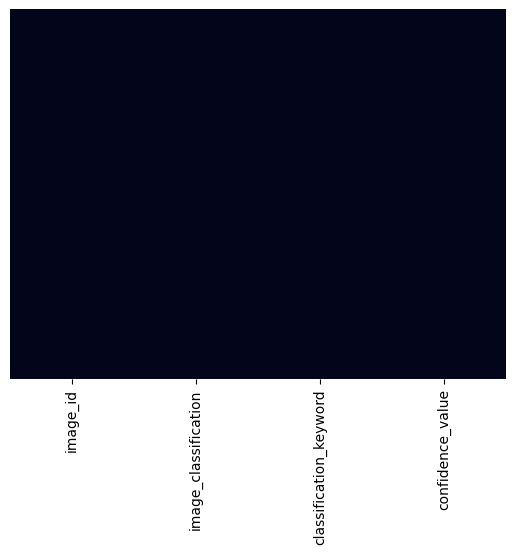

In [118]:
sns.heatmap(df_k.isnull(),yticklabels=False,cbar=False)

In [119]:
df_k.to_csv('mod_keywords.csv',index=False)

In [120]:
df_c=pd.read_csv('train_colors.csv')

In [121]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119891 entries, 0 to 119890
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   image_id        119891 non-null  object 
 1   R               119891 non-null  int64  
 2   G               119891 non-null  int64  
 3   B               119891 non-null  int64  
 4   image_hex       119891 non-null  object 
 5   keyword         119891 non-null  object 
 6   pixel_coverage  119891 non-null  float64
 7   color_score     119891 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 7.3+ MB


<AxesSubplot:>

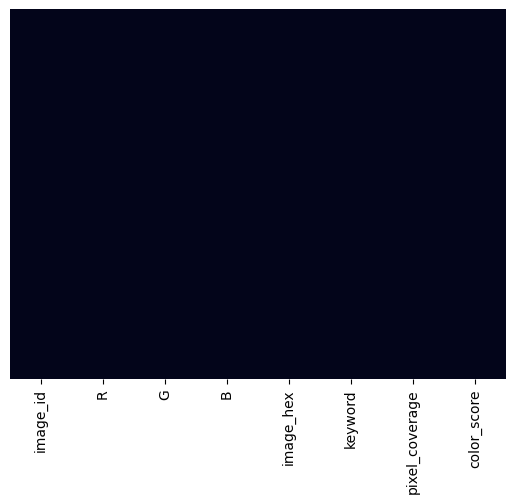

In [124]:
sns.heatmap(df_c.isnull(),yticklabels=False,cbar=False)